In [106]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, glm
import pandas as pd
import seaborn as sns

In [107]:
df = pd.read_excel("data_raket.xlsx")
df = df.rename(columns={'test':'test', 'doel snelheid (in knopen)':'doel', 'resultaat (0=mis 1=raak)':'resultaat'}).copy()
df.head()

,test,doel,resultaat,laag,hoog
0,1,400,0,0.087783,0.584570
1,2,210,1,0.621714,0.985459
2,3,490,0,0.008746,0.389691
3,4,220,1,0.602198,0.981017
4,5,500,0,0.006627,0.372296


In [108]:
df = df.sort_values(by='doel')

In [109]:
model = logit("resultaat ~ doel", data=df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.410194
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              resultaat   No. Observations:                   25
Model:                          Logit   Df Residuals:                       23
Method:                           MLE   Df Model:                            1
Date:                Sat, 15 Apr 2023   Pseudo R-squ.:                  0.4075
Time:                        16:31:27   Log-Likelihood:                -10.255
converged:                       True   LL-Null:                       -17.309
Covariance Type:            nonrobust   LLR p-value:                 0.0001726
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0660      2.116      2.867      0.004       1.919      10.213
doel          -0.0177      0.006     -2.908      0.004      -0.030      -0.006
==============================================================================
"""

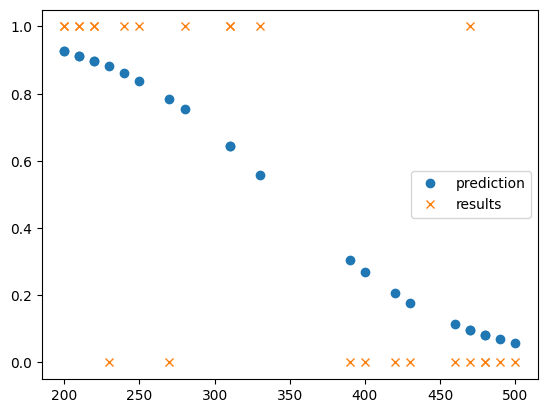

In [110]:
plt.plot(df['doel'], model.predict(), 'o', label='prediction')
plt.plot(df['doel'], df['resultaat'], 'x', label='results')
plt.legend()

In [111]:
x_pred = np.arange(np.min(df['doel']), np.max(df['doel']), 0.1)
x_pred
X_pred = sm.add_constant(x_pred)

In [112]:
x = np.array(df['doel'])
X = sm.add_constant(x)
y = df['resultaat']


model = sm.Logit(y, X).fit()
proba = model.predict(X_pred)

Optimization terminated successfully.
         Current function value: 0.410194
         Iterations 6


In [113]:
cov = model.cov_params()
gradient = (
    proba * (1 - proba) * X_pred.T
).T  # matrix of gradients for each observation
std_errors = np.array(
    [np.sqrt(np.dot(np.dot(g, cov), g)) for g in gradient]
)
c = 2.0 # multiplier for confidence interval
upper = np.maximum(0, np.minimum(1, proba + std_errors * c))
lower = np.maximum(0, np.minimum(1, proba - std_errors * c))

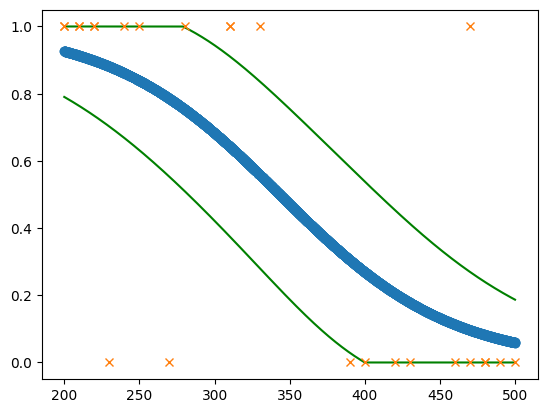

In [114]:
plt.plot(x_pred, proba, 'o')
plt.plot(x_pred, upper, '-g')
plt.plot(x_pred, lower, 'g-')
plt.plot(x, y, 'x')